## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = '/Users/davidey/08-2023_airbnb Berlin'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_6.4_done.pkl'))

In [5]:
df.shape

(56793, 23)

In [6]:
df.head()

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
0,2023-06-23,False,1.0,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,...,83.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,False
1,2023-06-23,False,1.0,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,...,180.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,True
2,2023-06-23,False,4.0,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,...,70.0,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,True
3,2023-06-23,False,4.0,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,...,92.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,False
4,2023-06-23,True,2.0,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,...,25.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,False


# 1. Pre-processing

In [7]:
#get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56793 entries, 0 to 56917
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   last_scraped                  56793 non-null  datetime64[ns]
 1   host_is_superhost             56793 non-null  bool          
 2   host_listings_count           56793 non-null  float64       
 3   neighbourhood_group_cleansed  56793 non-null  object        
 4   latitude                      56793 non-null  float64       
 5   longitude                     56793 non-null  float64       
 6   km_distance_from_center       56793 non-null  float64       
 7   property_type                 56793 non-null  object        
 8   room_type                     56793 non-null  object        
 9   accommodates                  56793 non-null  int64         
 10  total_bathrooms               56793 non-null  float64       
 11  bedrooms                    

In [8]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local'],
      dtype='object')

In [9]:
#making a list of all numerical and boolean columns (latter need to be converted)
df_preprocessed_columns = ['host_is_superhost', 'host_listings_count', 'km_distance_from_center', 'accommodates', 'total_bathrooms',
                    'bedrooms', 'beds', 'price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'is_host_local']

In [10]:
df_preprocessed = df[df_preprocessed_columns]

In [11]:
#convert booleans to float
columns_to_convert = ['license', 'is_host_local', 'host_is_superhost']

df_preprocessed[columns_to_convert] = df_preprocessed[columns_to_convert].astype(float)

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_34945/270028781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[columns_to_convert] = df_preprocessed[columns_to_convert].astype(float)


In [12]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56793 entries, 0 to 56917
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            56793 non-null  float64
 1   host_listings_count          56793 non-null  float64
 2   km_distance_from_center      56793 non-null  float64
 3   accommodates                 56793 non-null  int64  
 4   total_bathrooms              56793 non-null  float64
 5   bedrooms                     56793 non-null  float64
 6   beds                         56793 non-null  float64
 7   price                        56793 non-null  float64
 8   review_scores_rating         56793 non-null  float64
 9   review_scores_accuracy       56793 non-null  float64
 10  review_scores_cleanliness    56793 non-null  float64
 11  review_scores_checkin        56793 non-null  float64
 12  review_scores_communication  56793 non-null  float64
 13  review_scores_lo

In [13]:
df_preprocessed.columns

Index(['host_is_superhost', 'host_listings_count', 'km_distance_from_center',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_host_local'],
      dtype='object')

In [14]:
df_preprocessed.head()

,host_is_superhost,host_listings_count,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
0,0.0,1.0,1.861024,4,1.0,1.0,2.0,83.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62,1.0,0.0
1,0.0,1.0,1.665384,7,2.5,4.0,7.0,180.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0
2,0.0,4.0,3.128248,1,1.0,1.0,1.0,70.0,4.67,5.00,4.84,4.68,4.84,4.58,4.42,0.0,1.0
3,0.0,4.0,2.771781,5,1.0,1.0,3.0,92.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,0.0,0.0
4,1.0,2.0,3.085462,2,1.0,1.0,1.0,25.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65,0.0,0.0


In [15]:
df_preprocessed.describe()

,host_is_superhost,host_listings_count,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
count,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000
mean,0.153980,9.427201,4.915297,2.851179,1.122348,1.282324,1.789129,97.187129,4.658471,4.787918,4.653335,4.817289,4.817127,4.755275,4.645208,0.435388,0.740038
std,0.360933,54.854938,3.463282,1.769177,0.378511,0.646286,1.386682,92.723834,0.631281,0.344434,0.433655,0.332183,0.343715,0.323233,0.388044,0.495812,0.438617
min,0.000000,1.000000,0.000329,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.932777,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000,0.000000,0.000000
50%,0.000000,1.000000,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000,0.000000,1.000000
75%,0.000000,3.000000,5.831874,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000,1.000000,1.000000
max,1.000000,1126.000000,27.135185,16.000000,8.500000,12.000000,29.000000,1343.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


### Standardization?

I explored standardization here, but found that ulatimately the charts looked virtually the same. As such, I did not standardize here.

### 2. The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_preprocessed).score(df_preprocessed) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/davidey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davidey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davidey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davidey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

[-660271684.0040333,
 -384993353.89114493,
 -248600784.23955303,
 -146514402.36965427,
 -102752137.15994307,
 -79155584.01111385,
 -64315686.048138395,
 -49746816.79157719,
 -41068763.909905955]

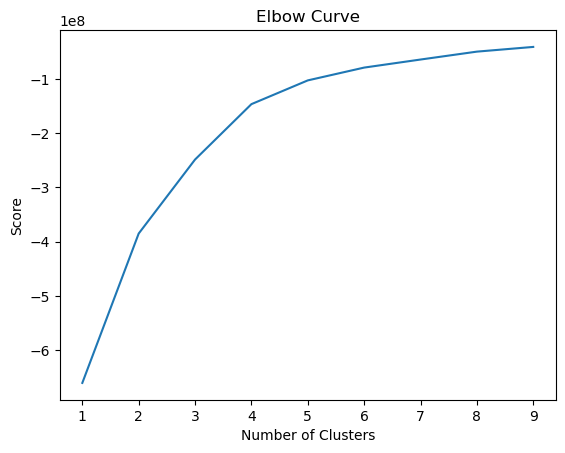

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this cluster, there's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is four.

### 3. k-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_preprocessed)

/Users/davidey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [21]:
df_preprocessed['clusters'] = kmeans.fit_predict(df_preprocessed)

/Users/davidey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_34945/704440299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['clusters'] = kmeans.fit_predict(df_preprocessed)


In [22]:
df_preprocessed.head()

,host_is_superhost,host_listings_count,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local,clusters
0,0.0,1.0,1.861024,4,1.0,1.0,2.0,83.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62,1.0,0.0,0
1,0.0,1.0,1.665384,7,2.5,4.0,7.0,180.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,2
2,0.0,4.0,3.128248,1,1.0,1.0,1.0,70.0,4.67,5.00,4.84,4.68,4.84,4.58,4.42,0.0,1.0,0
3,0.0,4.0,2.771781,5,1.0,1.0,3.0,92.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,0.0,0.0,0
4,1.0,2.0,3.085462,2,1.0,1.0,1.0,25.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65,0.0,0.0,0


In [23]:
df_preprocessed['clusters'].value_counts()

0    45048
2    10432
1      924
3      389
Name: clusters, dtype: int64

In [24]:
df_preprocessed.columns

Index(['host_is_superhost', 'host_listings_count', 'km_distance_from_center',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_host_local', 'clusters'],
      dtype='object')

### Host Listings Count and Price

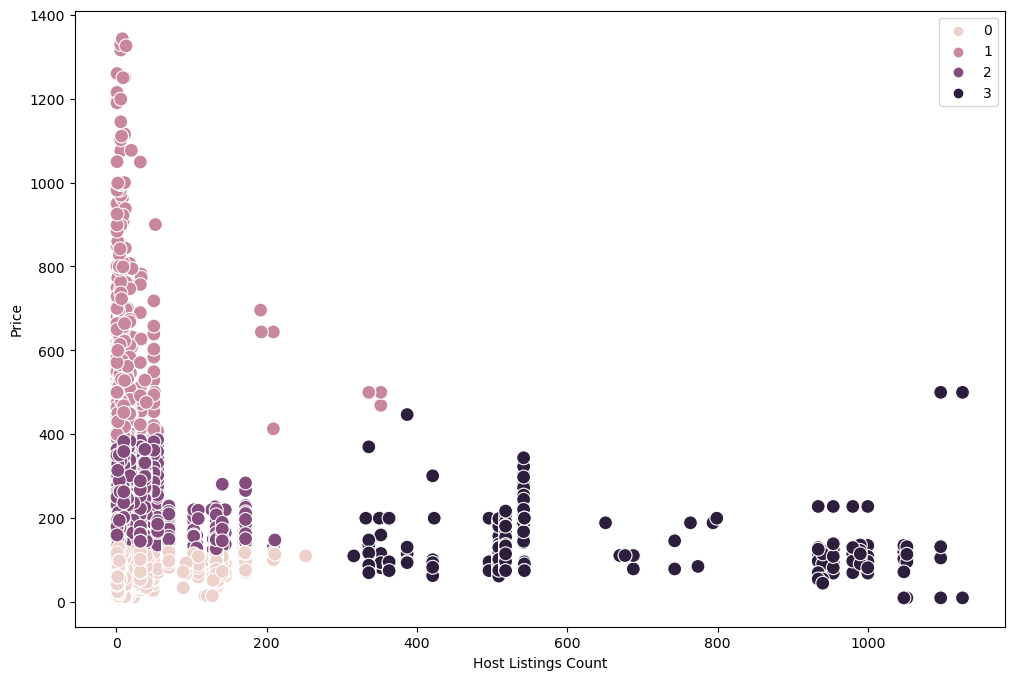

In [25]:
# Plot the clusters for the "host_listings_count" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['host_listings_count'], y=df_preprocessed['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Listings Count') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Higher host listing counts actually mean less cost.

In [26]:
df_preprocessed.loc[df_preprocessed['clusters'] == 3, 'clusters'] = 'dark purple (3)'
df_preprocessed.loc[df_preprocessed['clusters'] == 2, 'clusters'] = 'purple (2)'
df_preprocessed.loc[df_preprocessed['clusters'] == 1, 'clusters'] = 'pink (1)'
df_preprocessed.loc[df_preprocessed['clusters'] == 0, 'clusters'] = 'beige (0)'

In [27]:
df_preprocessed.groupby('clusters').agg({'km_distance_from_center':['mean', 'median'], 
                         'host_listings_count':['mean', 'median'], 
                                         'accommodates':['mean', 'median'], 
                         'total_bathrooms':['mean', 'median'],
                        'bedrooms':['mean', 'median'],
                        'beds':['mean', 'median'],
                          'price':['mean', 'median'],
                                         'license' :['mean', 'median'],
                                         'is_host_local':['mean', 'median'],
                                         'host_is_superhost':['mean', 'median']
                                        })

km_distance_from_center           host_listings_count         \
                                   mean    median                mean median   
clusters                                                                       
beige (0)                      5.054714  4.297128            3.921084    1.0   
dark purple (3)                5.465044  3.652182          605.560411  518.0   
pink (1)                       4.611951  3.742582            9.549784    4.0   
purple (2)                     4.319628  3.566975           10.963861    2.0   

                accommodates        total_bathrooms         bedrooms         \
                        mean median            mean median      mean median   
clusters                                                                      
beige (0)           2.436645    2.0        1.072356    1.0  1.151594    1.0   
dark purple (3)     3.200514    3.0        1.083548    1.0  1.177378    1.0   
pink (1)            6.047619    5.0        1.764069    1.5  2.436147    2.0   
purple (2)          4.345092    4.0        1.282832    1.0  1.748562    1.0   

                     beds              price          license         \
                     mean median        mean median      mean median   
clusters                                                               
beige (0)        1.525395    1.0   63.141773   60.0  0.341258    0.0   
dark purple (3)  2.069409    2.0  150.390746  131.0  0.737789    1.0   
pink (1)         3.902597    3.0  574.616883  500.0  0.692641    1.0   
purple (2)       2.730349    2.0  199.931940  180.0  0.807803    1.0   

                is_host_local        host_is_superhost         
                         mean median              mean median  
clusters                                                       
beige (0)            0.751620    1.0          0.126288    0.0  
dark purple (3)      0.000000    0.0          0.000000    0.0  
pink (1)             0.659091    1.0          0.280303    0.0  
purple (2)           0.724789    1.0          0.268117    0.0

In [28]:
df_preprocessed.columns

Index(['host_is_superhost', 'host_listings_count', 'km_distance_from_center',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_host_local', 'clusters'],
      dtype='object')

# Distance from Center and Price

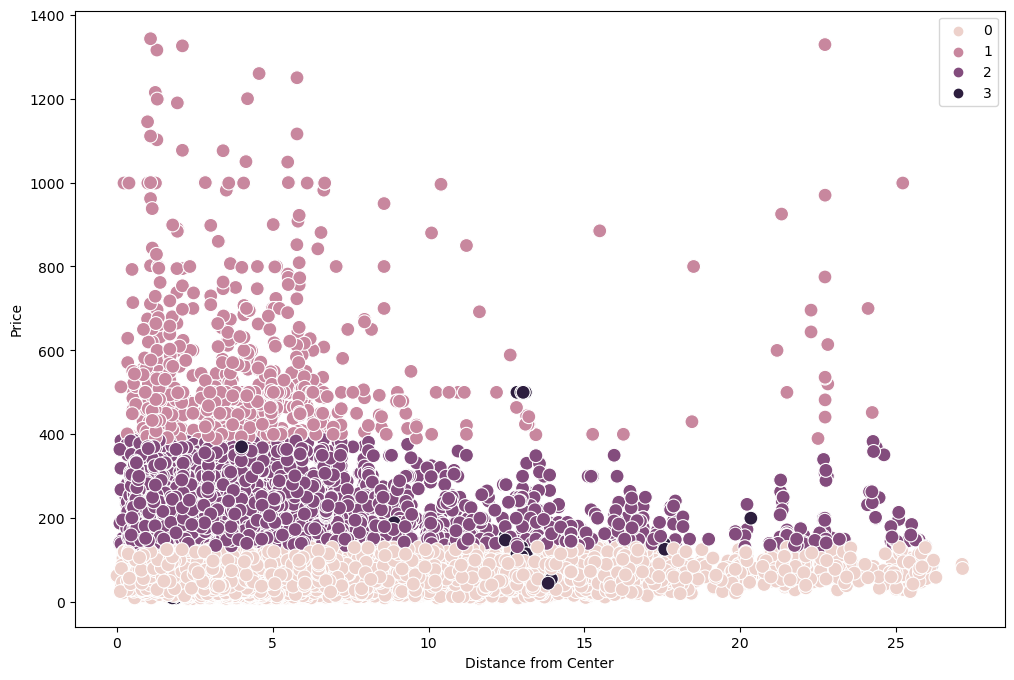

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['km_distance_from_center'], y=df_preprocessed['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance from Center') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Definitely further demonstrates That higher prices are towards the center, but there is not such a trend as most arecost less than 200.

# Accomodation Capacity and Price

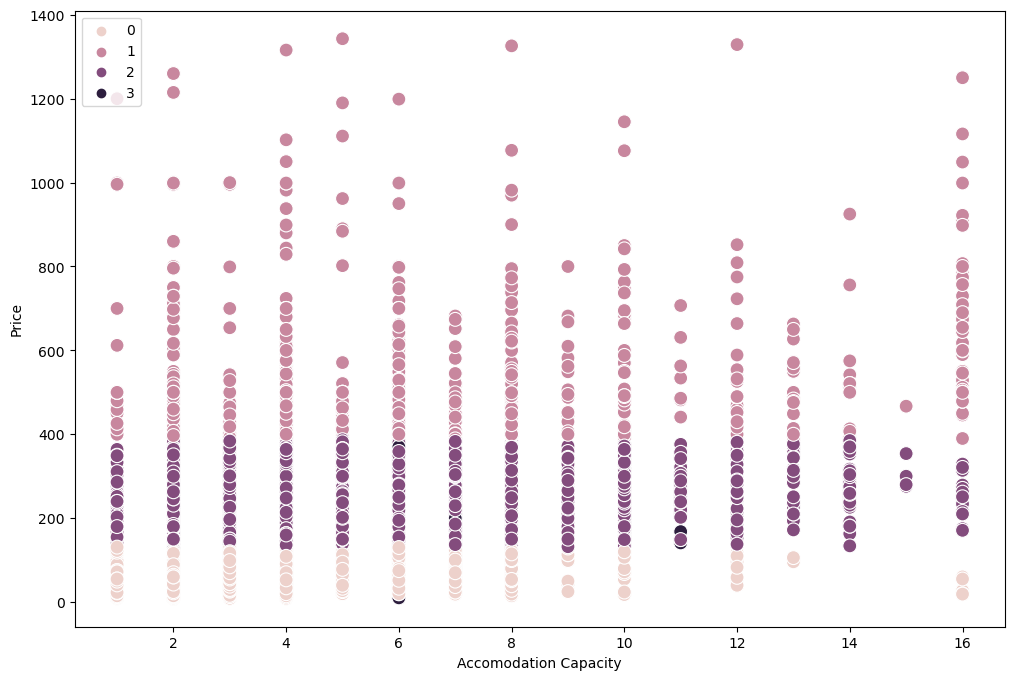

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['accommodates'], y=df_preprocessed['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Accomodation Capacity') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Demonstrates prices as a key clustering value, but capacity isn't actually such a correlating value.

# Beds and Price

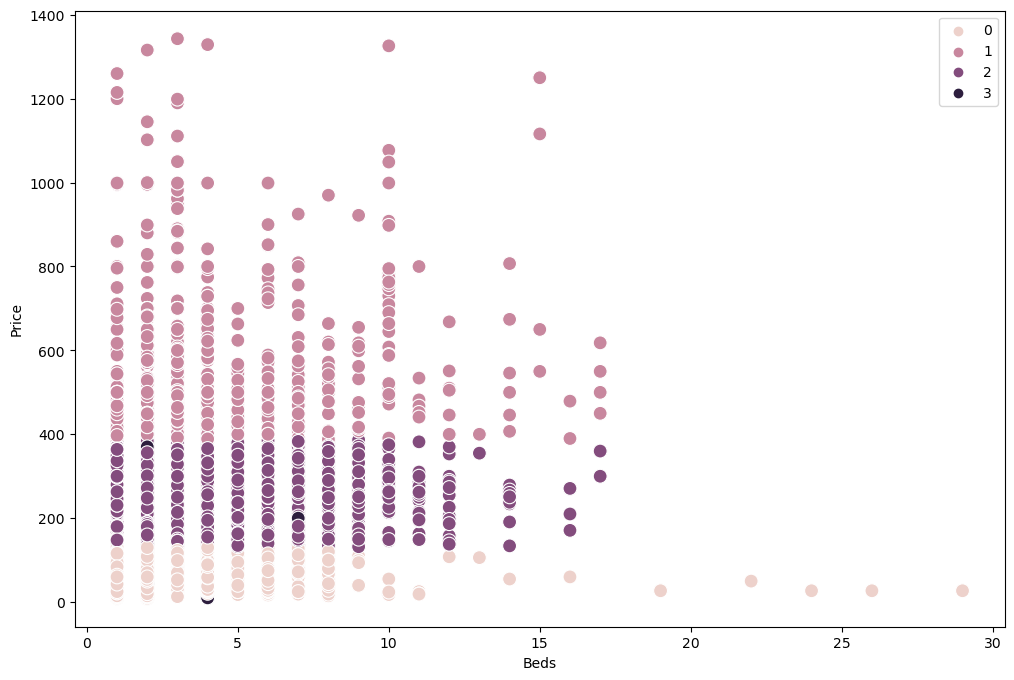

In [31]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['beds'], y=df_preprocessed['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Beds') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

I think this also effectively shows the lack of correlation of beds and price, but shows reasonable clusters in terms of price.

# Overall Rating and Price

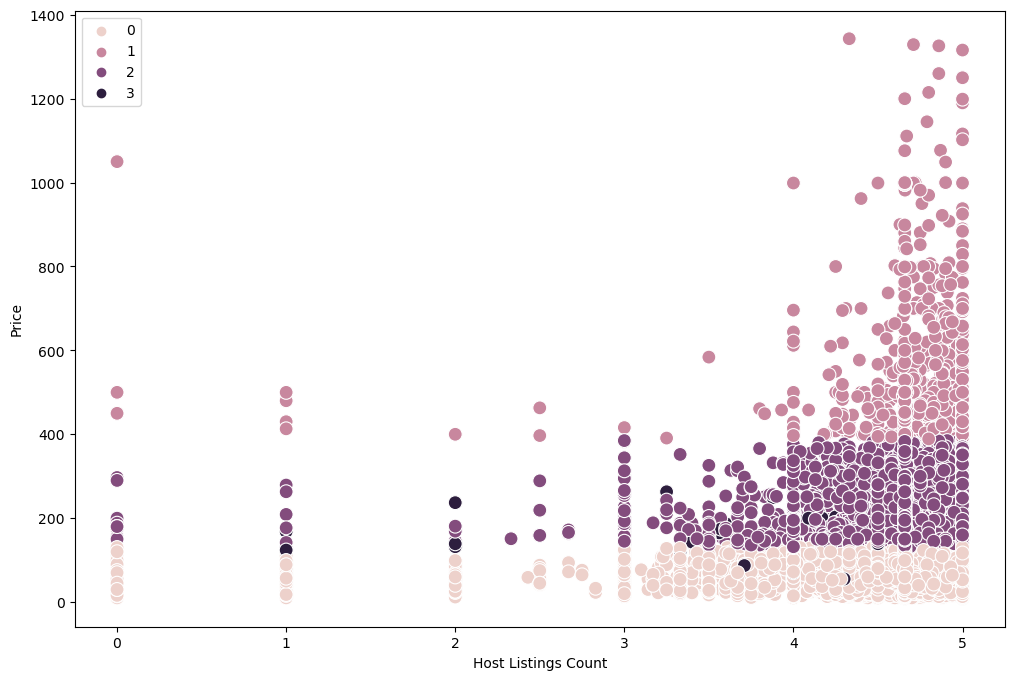

In [32]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_rating'], y=df_preprocessed['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Listings Count') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [33]:
df_preprocessed.columns

Index(['host_is_superhost', 'host_listings_count', 'km_distance_from_center',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_host_local', 'clusters'],
      dtype='object')

# Accuracy and Overall Rating

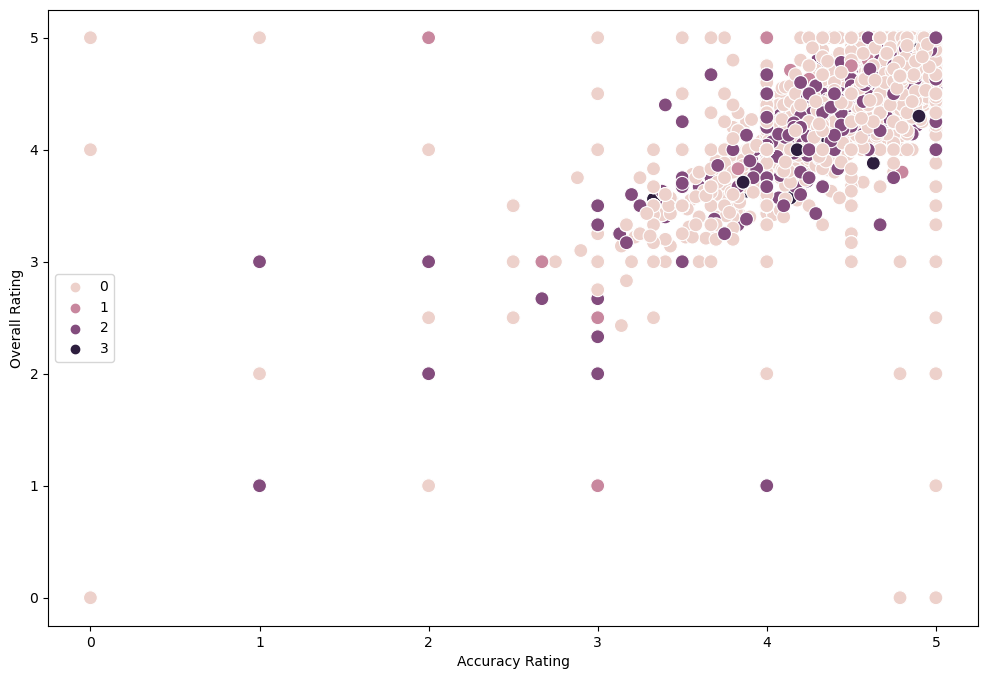

In [34]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_accuracy'], y=df_preprocessed['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Accuracy Rating') # Label x-axis.
plt.ylabel('Overall Rating') # Label y-axis.
plt.show()

# Cleanliness and Overall Rating

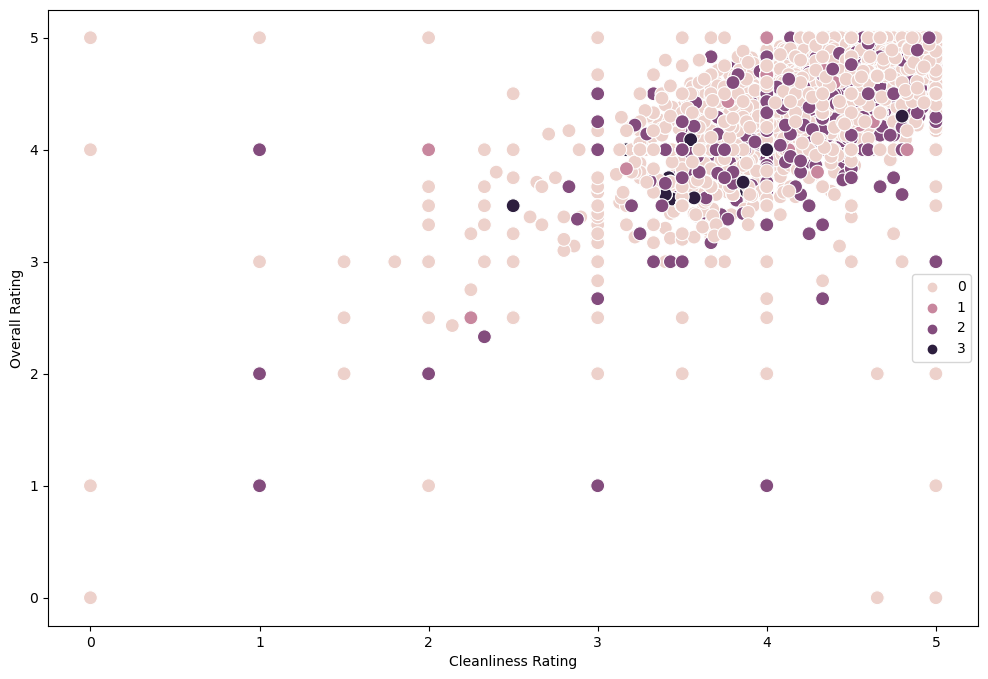

In [35]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_cleanliness'], y=df_preprocessed['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cleanliness Rating') # Label x-axis.
plt.ylabel('Overall Rating') # Label y-axis.
plt.show()

# Check-in and Overall Rating

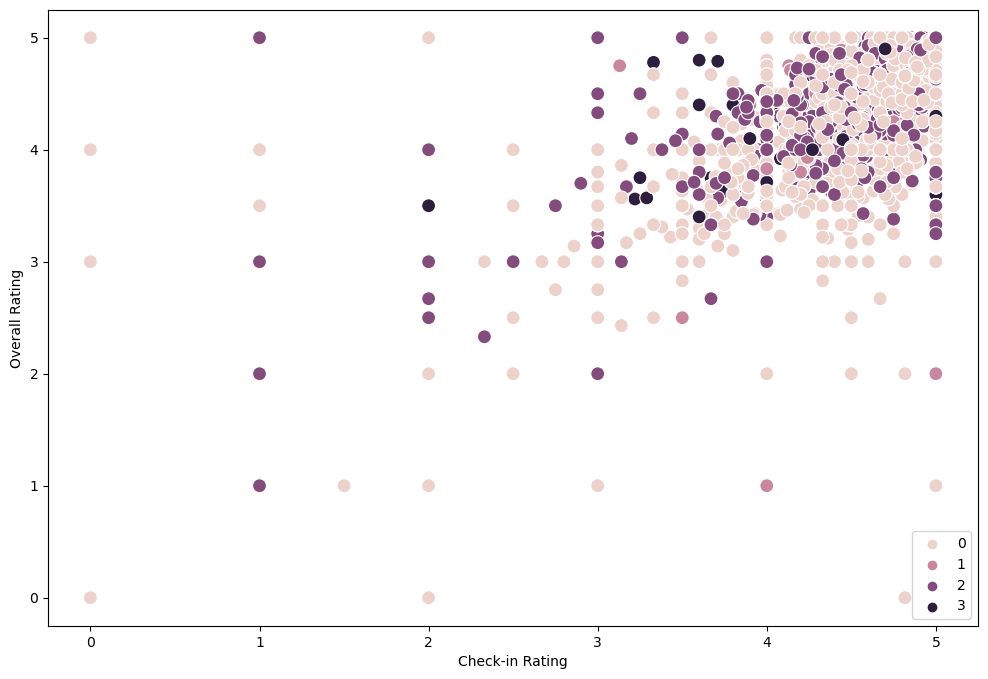

In [36]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_checkin'], y=df_preprocessed['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Check-in Rating') # Label x-axis.
plt.ylabel('Overall Rating') # Label y-axis.
plt.show()

# Communication and Overall Rating

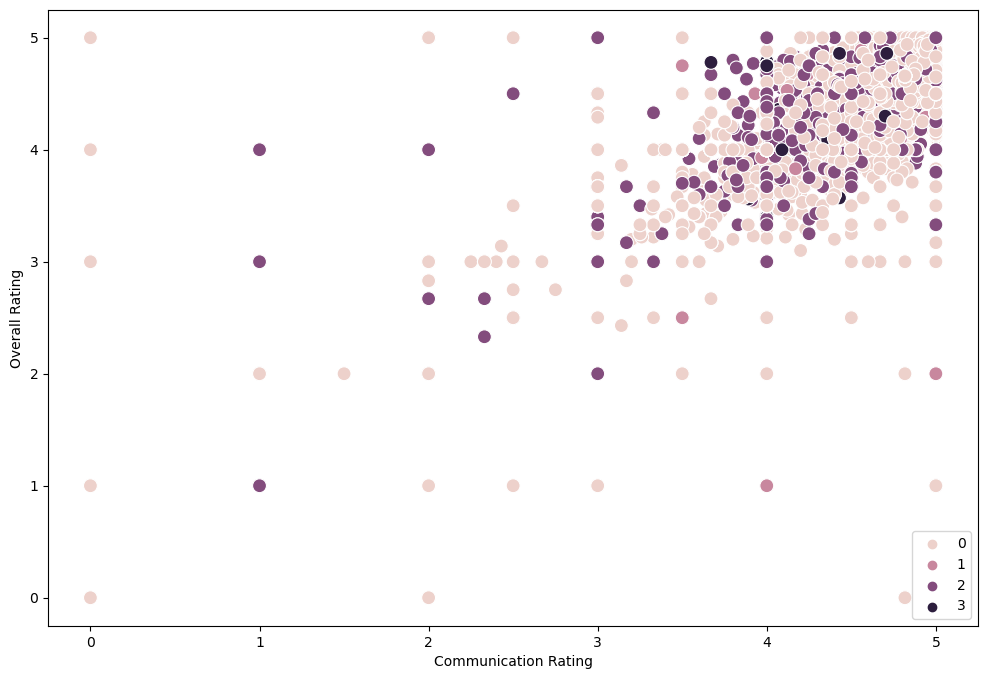

In [37]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_communication'], y=df_preprocessed['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Communication Rating') # Label x-axis.
plt.ylabel('Overall Rating') # Label y-axis.
plt.show()

# Location and Overall Rating

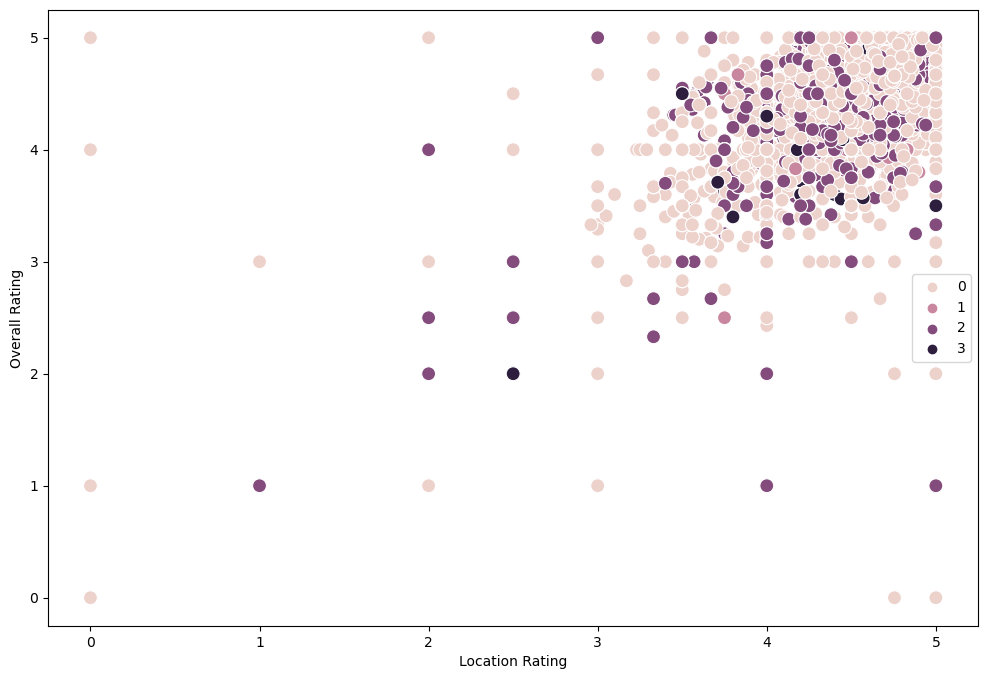

In [38]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_location'], y=df_preprocessed['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location Rating') # Label x-axis.
plt.ylabel('Overall Rating') # Label y-axis.
plt.show()

# Value and Overall Rating

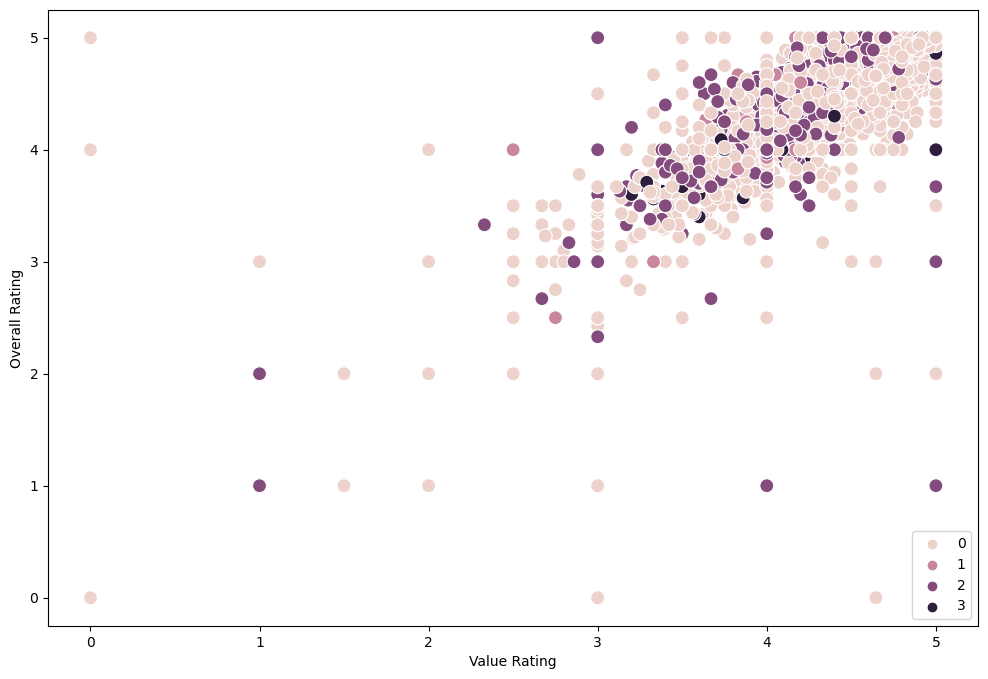

In [39]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_preprocessed['review_scores_value'], y=df_preprocessed['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Value Rating') # Label x-axis.
plt.ylabel('Overall Rating') # Label y-axis.
plt.show()

## Overall these ratings clusters show little variety

In [40]:
df_preprocessed.columns

Index(['host_is_superhost', 'host_listings_count', 'km_distance_from_center',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_host_local', 'clusters'],
      dtype='object')

In [41]:
df_preprocessed.groupby('clusters').agg({'review_scores_rating':['mean', 'median'], 
                         'review_scores_accuracy':['mean', 'median'], 
                                         'review_scores_cleanliness':['mean', 'median'], 
                         'review_scores_checkin':['mean', 'median'],
                        'review_scores_communication':['mean', 'median'],
                        'review_scores_location':['mean', 'median'],
                          'review_scores_value':['mean', 'median'],
                                        
                                        })

review_scores_rating           review_scores_accuracy  \
                                mean    median                   mean   
clusters                                                                
beige (0)                   4.643033  4.750000               4.788950   
dark purple (3)             4.510695  4.658437               4.613619   
pink (1)                    4.671268  4.720000               4.754059   
purple (2)                  4.729510  4.790000               4.792963   

                          review_scores_cleanliness           \
                   median                      mean   median   
clusters                                                       
beige (0)        4.840000                  4.637809  4.67000   
dark purple (3)  4.787921                  4.532561  4.65333   
pink (1)         4.787921                  4.697070  4.73000   
purple (2)       4.830000                  4.721013  4.77000   

                review_scores_checkin           review_scores_communication  \
                                 mean    median                        mean   
clusters                                                                      
beige (0)                    4.819742  4.880000                    4.820354   
dark purple (3)              4.536960  4.817192                    4.608717   
pink (1)                     4.797054  4.817192                    4.804601   
purple (2)                   4.818941  4.860000                    4.812071   

                          review_scores_location            \
                   median                   mean    median   
clusters                                                     
beige (0)        4.890000               4.750638  4.770000   
dark purple (3)  4.817044               4.666001  4.755165   
pink (1)         4.817044               4.756560  4.755165   
purple (2)       4.870000               4.778515  4.820000   

                review_scores_value            
                               mean    median  
clusters                                       
beige (0)                  4.655132  4.670000  
dark purple (3)            4.401370  4.645043  
pink (1)                   4.568334  4.645043  
purple (2)                 4.618252  4.645043

## Property Type

In [42]:
# Very important to first ensure the column rows and content are the same

In [43]:
df_preprocessed.shape

(56793, 18)

In [44]:
df_preprocessed.head(727)

,host_is_superhost,host_listings_count,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local,clusters
0,0.0,1.0,1.861024,4,1.0,1.0,2.0,83.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62,1.0,0.0,beige (0)
1,0.0,1.0,1.665384,7,2.5,4.0,7.0,180.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,purple (2)
2,0.0,4.0,3.128248,1,1.0,1.0,1.0,70.0,4.67,5.00,4.84,4.68,4.84,4.58,4.42,0.0,1.0,beige (0)
3,0.0,4.0,2.771781,5,1.0,1.0,3.0,92.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,0.0,0.0,beige (0)
4,1.0,2.0,3.085462,2,1.0,1.0,1.0,25.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65,0.0,0.0,beige (0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0.0,2.0,4.419539,2,1.0,1.0,1.0,43.0,4.79,4.92,4.63,5.00,4.96,4.79,4.58,0.0,1.0,beige (0)
723,0.0,5.0,3.889910,4,1.0,1.0,2.0,118.0,4.67,4.66,4.76,4.77,4.74,4.80,4.53,1.0,1.0,beige (0)
724,0.0,3.0,6.292107,3,1.0,2.0,2.0,80.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,beige (0)
726,1.0,2.0,13.672270,1,1.0,1.0,1.0,39.0,4.82,4.90,4.66,4.91,4.89,4.83,4.90,1.0,1.0,beige (0)


In [45]:
df.head(727)

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
0,2023-06-23,False,1.0,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,...,83.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,False
1,2023-06-23,False,1.0,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,...,180.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,True
2,2023-06-23,False,4.0,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,...,70.0,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,True
3,2023-06-23,False,4.0,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,...,92.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,False
4,2023-06-23,True,2.0,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,...,25.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2023-06-23,False,2.0,Mitte,52.53346,13.34348,4.419539,Entire rental unit,Entire home/apt,2,...,43.0,4.79,4.92,4.63,5.00,4.96,4.79,4.58,False,True
723,2023-06-23,False,5.0,Friedrichshain-Kreuzberg,52.48950,13.37683,3.889910,Entire rental unit,Entire home/apt,4,...,118.0,4.67,4.66,4.76,4.77,4.74,4.80,4.53,True,True
724,2023-06-23,False,3.0,Charlottenburg-Wilmersdorf,52.49388,13.32249,6.292107,Entire rental unit,Entire home/apt,3,...,80.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False,False
726,2023-06-22,True,2.0,Marzahn-Hellersdorf,52.51258,13.60664,13.672270,Entire guest suite,Entire home/apt,1,...,39.0,4.82,4.90,4.66,4.91,4.89,4.83,4.90,True,True


In [46]:
df.tail()

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
56913,2022-09-16,False,4.0,Treptow-Köpenick,52.45776,13.72540,22.774147,Private room in home,Private room,3,...,99.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,False
56914,2022-09-16,True,1.0,Treptow-Köpenick,52.41807,13.74173,25.473609,Entire rental unit,Entire home/apt,4,...,160.0,5.000000,5.000000,4.96000,5.000000,5.000000,5.000000,4.700000,False,False
56915,2022-09-16,False,4.0,Treptow-Köpenick,52.45965,13.72548,22.715886,Private room in home,Private room,6,...,195.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,False
56916,2022-09-16,False,1.0,Treptow-Köpenick,52.46061,13.69917,20.986595,Entire rental unit,Entire home/apt,2,...,60.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,False
56917,2022-09-16,True,2.0,Treptow-Köpenick,52.45520,13.75608,24.842954,Entire rental unit,Entire home/apt,2,...,60.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,True


In [47]:
df_preprocessed.tail()

,host_is_superhost,host_listings_count,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local,clusters
56913,0.0,4.0,22.774147,3,1.0,1.0,3.0,99.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,0.0,0.0,beige (0)
56914,1.0,1.0,25.473609,4,1.0,2.0,2.0,160.0,5.000000,5.000000,4.96000,5.000000,5.000000,5.000000,4.700000,0.0,0.0,purple (2)
56915,0.0,4.0,22.715886,6,1.0,1.0,4.0,195.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,0.0,0.0,purple (2)
56916,0.0,1.0,20.986595,2,1.0,1.0,1.0,60.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,0.0,0.0,beige (0)
56917,1.0,2.0,24.842954,2,1.0,1.0,2.0,60.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,0.0,1.0,beige (0)


In [48]:
df.shape

(56793, 23)

Everything looks fine.

In [49]:
# merge dataframes
df = df.reset_index(drop=True)
df_preprocessed = df_preprocessed.reset_index(drop=True)

# Select the 'clusters' column from df_preprocessed
clusters_column = df_preprocessed['clusters']

# Concatenate the 'clusters' column onto the df DataFrame
merged_df = pd.concat([df, clusters_column], axis=1)


In [50]:
merged_df.head()

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local,clusters
0,2023-06-23,False,1.0,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,...,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,False,beige (0)
1,2023-06-23,False,1.0,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,...,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,True,purple (2)
2,2023-06-23,False,4.0,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,...,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,True,beige (0)
3,2023-06-23,False,4.0,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,...,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,False,beige (0)
4,2023-06-23,True,2.0,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,...,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,False,beige (0)


In [51]:
merged_df.tail()

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local,clusters
56788,2022-09-16,False,4.0,Treptow-Köpenick,52.45776,13.72540,22.774147,Private room in home,Private room,3,...,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,False,beige (0)
56789,2022-09-16,True,1.0,Treptow-Köpenick,52.41807,13.74173,25.473609,Entire rental unit,Entire home/apt,4,...,5.000000,5.000000,4.96000,5.000000,5.000000,5.000000,4.700000,False,False,purple (2)
56790,2022-09-16,False,4.0,Treptow-Köpenick,52.45965,13.72548,22.715886,Private room in home,Private room,6,...,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,False,purple (2)
56791,2022-09-16,False,1.0,Treptow-Köpenick,52.46061,13.69917,20.986595,Entire rental unit,Entire home/apt,2,...,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,False,beige (0)
56792,2022-09-16,True,2.0,Treptow-Köpenick,52.45520,13.75608,24.842954,Entire rental unit,Entire home/apt,2,...,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,True,beige (0)


Looks all good!

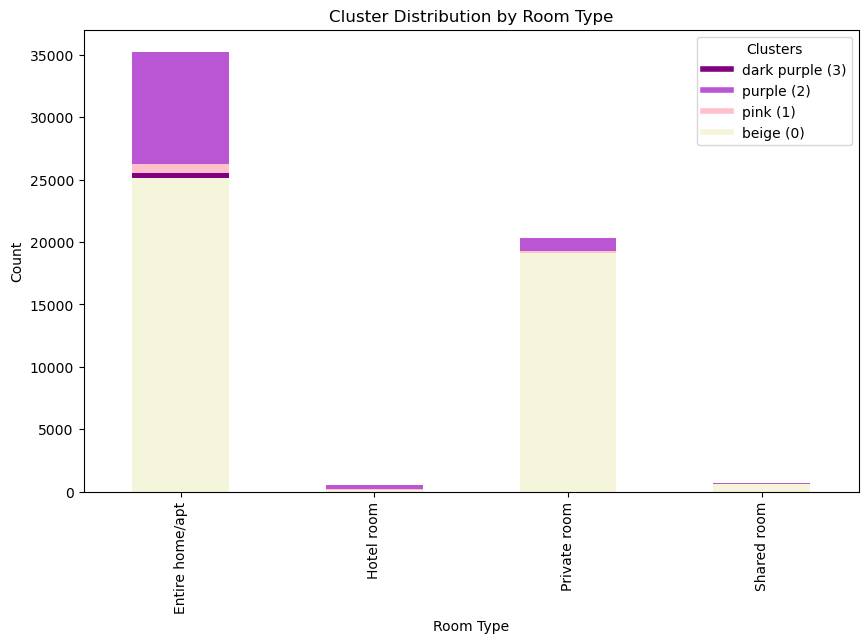

In [52]:
cluster_colors = {
    'dark purple (3)': 'purple',
    'purple (2)': 'mediumorchid',
    'pink (1)': 'pink',
    'beige (0)': 'beige'
}

# Group the data by 'room_type' and 'clusters', then count occurrences
grouped_data = merged_df.groupby(['room_type', 'clusters']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='room_type', columns='clusters', values='count')

# Plot the bar graph
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=[cluster_colors[col] for col in pivot_data.columns])
plt.title("Cluster Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")

# Create custom legend using cluster_colors
legend_colors = [plt.Line2D([0], [0], color=color, lw=4) for color in cluster_colors.values()]
plt.legend(legend_colors, cluster_colors.keys(), title='Clusters')

plt.show()

This shows that not only is beige the largest cluster, but they actually manage a lot of entire homes too.

# Maps

## Neighborhood Group

In [53]:
merged_df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local', 'clusters'],
      dtype='object')

### Create a new dataframe with the modes of the property type and neighborhood columns

In [54]:
from scipy import stats
from scipy.stats import mode

In [55]:
# Define a custom function to calculate mode for string columns
def get_mode(x):
    return x.mode().iloc[0]

# Group by "neighbourhood_group_cleansed" and aggregate using the custom function for modes
grouped_df = merged_df.groupby('neighbourhood_group_cleansed').agg({
    'room_type': get_mode,
    'clusters': get_mode
}).reset_index()

# Rename the columns for clarity
grouped_df.rename(columns={
    'room_type': 'mode_room_type',
    'clusters': 'mode_clusters'
}, inplace=True)

# Display the resulting DataFrame
print(grouped_df)

   neighbourhood_group_cleansed   mode_room_type mode_clusters
0    Charlottenburg-Wilmersdorf  Entire home/apt     beige (0)
1      Friedrichshain-Kreuzberg  Entire home/apt     beige (0)
2                   Lichtenberg  Entire home/apt     beige (0)
3           Marzahn-Hellersdorf  Entire home/apt     beige (0)
4                         Mitte  Entire home/apt     beige (0)
5                      Neukölln  Entire home/apt     beige (0)
6                        Pankow  Entire home/apt     beige (0)
7                 Reinickendorf  Entire home/apt     beige (0)
8                       Spandau  Entire home/apt     beige (0)
9           Steglitz-Zehlendorf  Entire home/apt     beige (0)
10         Tempelhof-Schöneberg  Entire home/apt     beige (0)
11             Treptow-Köpenick  Entire home/apt     beige (0)


Ok, that is pretty clear. Not very useful as a map truly, but good to know. What I rather need is the counts of each property type and cluster by neighborhood:

In [56]:
# Group by "neighbourhood_group_cleansed" and "clusters", then count the occurrences
cluster_counts = merged_df.groupby(['neighbourhood_group_cleansed', 'clusters']).size().reset_index(name='cluster_count')

# Group by "neighbourhood_group_cleansed" and "property_type", then count the occurrences
room_counts = merged_df.groupby(['neighbourhood_group_cleansed', 'room_type']).size().reset_index(name='property_count')

# Display the resulting DataFrames
print(cluster_counts)
print(room_counts)

   neighbourhood_group_cleansed         clusters  cluster_count
0    Charlottenburg-Wilmersdorf        beige (0)           3712
1    Charlottenburg-Wilmersdorf  dark purple (3)             15
2    Charlottenburg-Wilmersdorf         pink (1)            111
3    Charlottenburg-Wilmersdorf       purple (2)            999
4      Friedrichshain-Kreuzberg        beige (0)          10117
5      Friedrichshain-Kreuzberg  dark purple (3)             18
6      Friedrichshain-Kreuzberg         pink (1)            159
7      Friedrichshain-Kreuzberg       purple (2)           2177
8                   Lichtenberg        beige (0)           1423
9                   Lichtenberg  dark purple (3)              2
10                  Lichtenberg         pink (1)             24
11                  Lichtenberg       purple (2)            174
12          Marzahn-Hellersdorf        beige (0)            350
13          Marzahn-Hellersdorf  dark purple (3)             14
14          Marzahn-Hellersdorf         

I think in retrospect a lat/long point map grouped by the clusters in Tableau will show this better and easier.

# Descriptions

In [57]:
#
df_preprocessed['clusters'].value_counts()

beige (0)          45048
purple (2)         10432
pink (1)             924
dark purple (3)      389
Name: clusters, dtype: int64

### Distance from center is all relatively comparable (mean 4.3-5.5km, med (3.6-4.3km) as are bathrooms (1.1-1.8, 1-1.5). Ratings are all within .2 of each other, few warrant special mentions. Very few properties are hotel rooms (531 in total) or shared rooms (668 in total).

### Cluster 0 Small-time Locals (79% of listings): Mostly eintire homes (24.6k) and private rooms (19k) but also largest holders of shared rooms (607). relatively further from center (5.1km mean, 4.3 med ), owners have fewest properties (3.9 ave, 1.0 med) and accomodate the fewest (2.4, 2) with 1 bathroom and bed on average (1 med) with the lowest prices (63, 60). They are least likely to have entered something about a license (34% have) and are most likely to be local (75% are). They aren't likely to be a superhost (12% are). Best ratings in check-in (4.82; tied with 2) communication (4.82) and value (4.66)

I would imagine these are simply local people renting out spare rooms. As a category this makes sense, that is the original idea of airbnb.

### Cluster 1  Luxury-property Professionals (1.6%): mostly entire homes (683) and private rooms (175). is relatively close to center (4.6km mean, 3.74 med) and owned by small landlords (9.5 mean, 4 median listings). They accomodate the most (6 mean, 5 med) with about 1.5 bathrooms (mean 1.7, 1.5) 2.4 bedrooms (2 med) 3.9 beds (3 med) and charge the highest prices (574.61 average, 500 med). 69% mentioned a license, 66% are local, and 28% are superhosts. Middling for all ratings.

These are people with large properties, which could even be hotels and hostels, but given the prices are more likely entire properties. It will be good to look at the property type.

### Cluster 2 Central property professionals (18%): mostly entire homes (9.5k) and private rooms (1k) but also largest share of hotel rooms (342).  is closest to center (4.32km mean, 3.6 med), owned by small landlords (11 listings mean, 2 med) and accomodate about 4 people with 1 bathroom 1.7 bedrooms (1 med) and 2.7 beds (2 med). They charge in the middle at 200 on average (180 median) and 80% mention a license. 72% are local and about 27% are superhosts. Best overall rating at 4.72 and leads nearly all other categories: accuracy 4.79, cleanliness 4.72, check-in 4.82 (tied with 0) communication 4.81 (just less than 0 at 4.82), location (4.77) and value 4.62 (just less than 0 at 4.66)

These seem to be local landlords; looking at the stats are most likely renting out entire places but small ones. Relative to the others, this makes sense

### Cluster 3 Distant property owners (0.6%): virtually all entire homes (381) with a few private rooms (8). is furthest from center on average (5.47km and 3.65 med) and have the most listings by far (605 average, 518 med). They accomodate about 3 people with 1 bathroom and bedroom but 2 beds. They charge relatively lower prices (150 mean, 131 median). 73% mention a license, but none are local or superhosts. Lowest overall average rating (4.66 on average). Worst ratings across the board: for accuracy (4.61 on average), cleanliness (4.53), check-in (4.53), location (4.67) and value (4.4).

#### These are the professional landlords who live elsewhere, which would explain the ratings.

In [58]:
#export dataset
merged_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_6.5_FINAL.pkl'))

In [59]:
merged_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_6.5_FINAL.csv'))